In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf 
from keras.utils import np_utils
from keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.utils import to_categorical
from keras.layers.core import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import BatchNormalization
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataframe = pd.read_csv('drive/MyDrive/fer2013.csv')
# data set contents
dataframe

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
# Getting the summary of dataset
print(dataframe.Usage.value_counts())

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64


In [ ]:
X = dataframe['pixels']
y = dataframe['emotion']

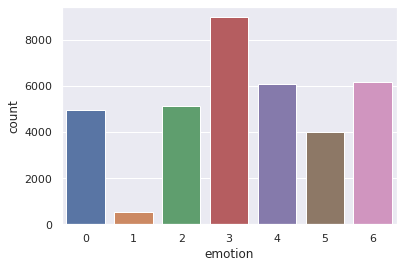

In [ ]:
#plotting the different emotions in graph 
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion", data=dataframe)

In [ ]:
# Allocating training and testing data based on the dataset's Usage column
train_data = dataframe.query("Usage == 'Training'")
test_data = dataframe.query("Usage != 'Training'")

# Normalization of data

In [ ]:
# Converting pixel strings to integers  
X_train = np.array(list(map(str.split, train_data.pixels)), np.float32) 
X_test = np.array(list(map(str.split, test_data.pixels)), np.float32) 
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1) 
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [ ]:
# Normalizing the data for training and testing
X_train=X_train/255
X_test=X_test/255

In [ ]:
# high probability on single emotion for the test data
y_train = train_data.emotion  
y_test = test_data.emotion 

# Data Augmentation

In [ ]:
# high probability on single emotion for the test data
y_train = np_utils.to_categorical(y_train, 7)
y_test = np_utils.to_categorical(y_test, 7)

In [ ]:
y_train_catg = to_categorical(y_train)
y_test_catg = to_categorical(y_test)

In [ ]:
 # Producing additional images by altering data propertiesin an existing dataset
 # These are developed to increase the data quantity such that the model can be better trained.
image_generator = ImageDataGenerator(
        rotation_range=5,  
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        zoom_range = 0.1,
        shear_range = 10,  
        horizontal_flip=True, 
        validation_split=0.2
)

# Allocating updated material to training and testing sets
train_iterate = image_generator.flow(X_train, y_train_catg, batch_size=128, subset='training')
val_iterate = image_generator.flow(X_train, y_train_catg, batch_size=128, subset='validation')  

# To build iamge data, traverse through genrator object.
gen_x, gen_y = next(train_iterate)

In [ ]:
y_test.shape

(7178, 7)

In [ ]:
X_test.shape

(7178, 48, 48, 1)

DEFINING LAYERS

In [ ]:
# clearing any previous session models
clear_session()
# Defining the models
input_shape = (None, 48, 48, 1)

model = Sequential()

model.add(Conv2D(64, 3, 1, activation='relu', padding = 'same'))
model.add(ZeroPadding2D((1,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, 1, activation='relu', padding = 'same'))
model.add(ZeroPadding2D((1,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, 3, 1, activation='relu', padding = 'same'))
model.add(ZeroPadding2D((1,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 zero_padding2d (ZeroPadding  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                        

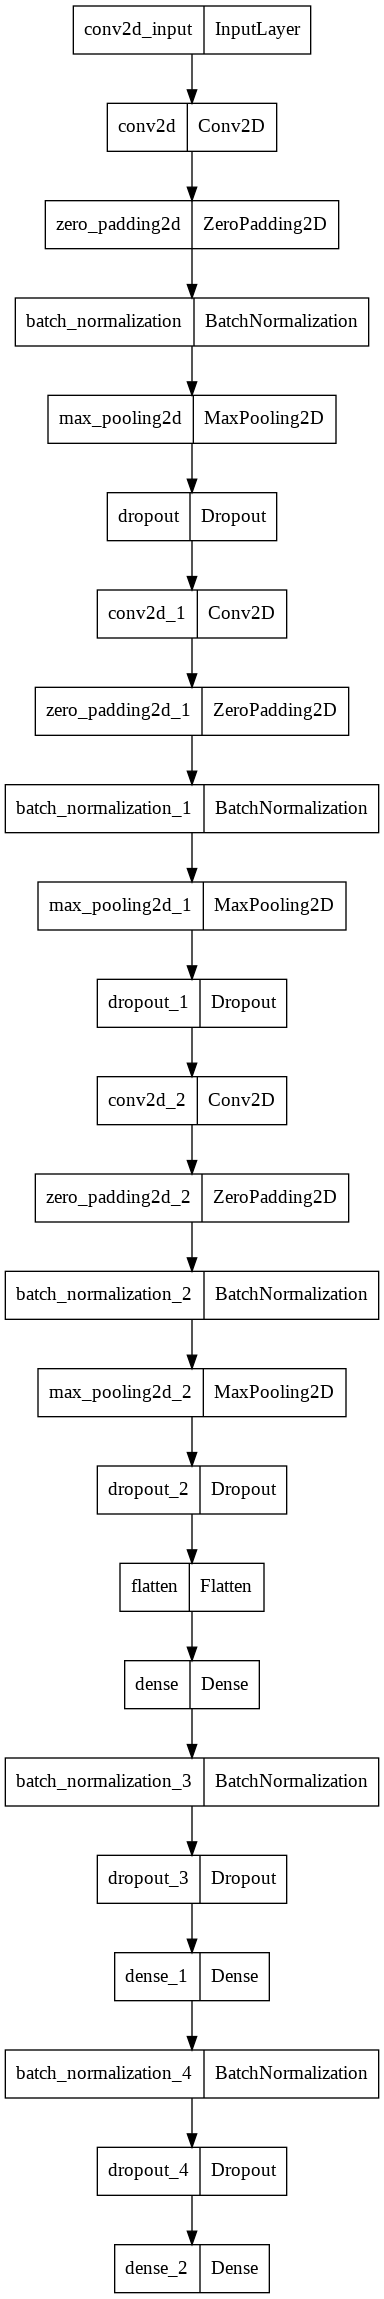

In [ ]:
plot_model(model)

In [ ]:
# creating a callback
my_callbacks = [EarlyStopping(patience=10, restore_best_weights=True)]
# Specifying the optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
# Compiling the model
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
# Training the model
history = model.fit(X_train,y_train,epochs=30, batch_size = 128,callbacks=my_callbacks, validation_data = (X_test,y_test))


Epoch 1/30
225/225 [==============================] - 41s 108ms/step - loss: 1.9287 - accuracy: 0.3024 - val_loss: 3.8577 - val_accuracy: 0.1718
Epoch 2/30
225/225 [==============================] - 24s 105ms/step - loss: 1.4853 - accuracy: 0.4371 - val_loss: 1.9200 - val_accuracy: 0.3465
Epoch 3/30
225/225 [==============================] - 22s 100ms/step - loss: 1.2930 - accuracy: 0.5085 - val_loss: 1.3804 - val_accuracy: 0.4691
Epoch 4/30
225/225 [==============================] - 23s 101ms/step - loss: 1.1845 - accuracy: 0.5516 - val_loss: 1.2976 - val_accuracy: 0.5121
Epoch 5/30
225/225 [==============================] - 23s 101ms/step - loss: 1.1035 - accuracy: 0.5826 - val_loss: 1.2288 - val_accuracy: 0.5304
Epoch 6/30
225/225 [==============================] - 23s 102ms/step - loss: 1.0315 - accuracy: 0.6145 - val_loss: 1.1128 - val_accuracy: 0.5775
Epoch 7/30
225/225 [==============================] - 23s 101ms/step - loss: 0.9662 - accuracy: 0.6381 - val_loss: 1.1915 - val_ac

In [ ]:
# Saving the Model
model.save("/content/drive/MyDrive/Dataset/Model_final.h5")

Evaluation

In [ ]:
# Evaluation of the trained model
model.evaluate(X_test,y_test)

225/225 [==============================] - 3s 11ms/step - loss: 1.1128 - accuracy: 0.5775


[1.112786889076233, 0.577458918094635]

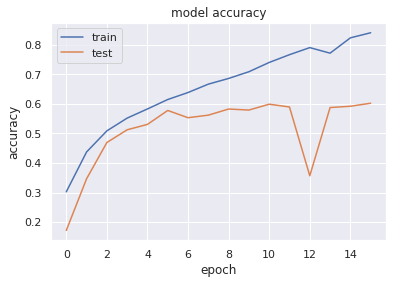

In [ ]:
# plotting the model's accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


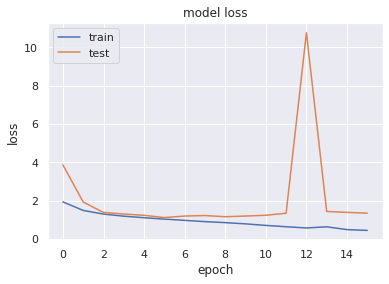

In [ ]:
## plotting the model's loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Additional Feature



In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image

In [ ]:
# Creating a list to contain emotions strings according on their dataset category index.
emotions = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']
# To extract the face from camera photos, haar cascade classifiers were used.
f_classifier = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
# Importing the trained model for emotion detection that was previously saved
model = load_model("/content/drive/MyDrive/Dataset/Model_final.h5")

<IPython.core.display.Javascript object>

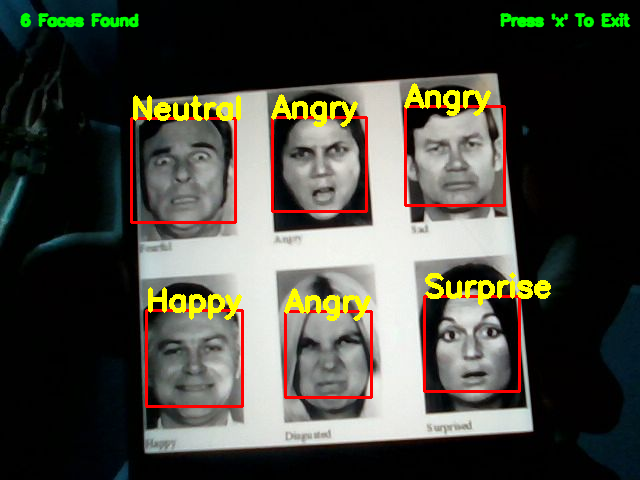

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def capture_image(filename='captured_image', quality=0.8):
  js = Javascript('''
    async function capturePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('capturePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

img = cv.imread(capture_image())
# Coverting it to grayscale image
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# Identifying faces within the ficture
faces = f_classifier.detectMultiScale(gray,1.3,5)
# To highlight the number of faces identified, add text to the window.
cv.putText(img, f'{len(faces)} Faces Found', (20, 25), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv.LINE_AA) 
cv.putText(img, "Press 'x' To Exit", (500, 25), cv.FONT_HERSHEY_SIMPLEX,  0.5, (0, 255, 0), 2, cv.LINE_AA) 
for (x,y,w,h) in faces:
    # Adding a rectungular box around the faces
    cv.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    # Getting the face out of the picture
    gray_roi = gray[y:y+h,x:x+w]
    gray_roi = cv.resize(gray_roi,(48,48),interpolation=cv.INTER_AREA)
    # rect,face,image = face_detector(camera_frame)
    if np.sum([gray_roi])!=0:
        region_of_int = gray_roi.astype('float')/255.0
        region_of_int = img_to_array(region_of_int)
        region_of_int = np.expand_dims(region_of_int,axis=0)
        # predict the emotion
        preds = model.predict(region_of_int)[0]
        # Labels
        emotion_label=emotions[preds.argmax()]
        label_position = (x,y)
        # Showing label
        cv.putText(img,emotion_label,label_position,cv.FONT_HERSHEY_SIMPLEX,1,(0,255,255),3)
# Output
cv2_imshow(img)